# RandomForests

# Model

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
rf_model = RandomForestRegressor(random_state = 42)

In [6]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### En önemli parametreler :

1. n_estimators = oluşturulacak ağaç sayısı
2. max_features = her bölünmede göze alınacak değişken sayısı
3. max_depth = dallanmaları en tepeden kontrol eden parametredir (overfitting önüne geçer)

# Tahmin

In [8]:
y_pred = rf_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred)) # ilkel hata

344.8191624908484

# Model Tuning

In [12]:
rf_params = {"max_depth": list(range(1, 10)),
             "max_features": [2, 4, 5, 10],
             "n_estimators": [100, 200, 500, 1000]}

In [14]:
rf_model = RandomForestRegressor(random_state = 42)

Yapılacak çok fazla deneme işlemi olduğundan işemcinin tam gücüyle kullanılmasına izin veren ### n_jobs = -1 ### parametresini gridsearch'e dahil ettik

In [15]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1)

In [16]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 4, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [17]:
rf_cv_model.best_params_

{'max_depth': 6, 'max_features': 2, 'n_estimators': 100}

In [18]:
# final model

In [67]:
rf_tuned = RandomForestRegressor(max_depth = 6, 
                                 max_features = 2,
                                 n_estimators = 100,
                                 random_state = 42)

In [68]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=2, random_state=42)

In [69]:
y_pred = rf_tuned.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred)) # tuned hata değeri

346.655412352411

Bagged_Trees ile RandomForest'in birbirine yakın çıkması beklenir çünkü RF ve Begging arasında bir ilişki vardır.

RF'da seçilecek değişken sayısını değişken sayısına eşitlediğimizde begging regresyon yapılmış olur (bizim veride 19). Begging regresyon RF modelinin özel bir halidir.

In [71]:
# Değişkenlerin önem düzeylerine erişmek istediğimiz zaman ne yapmalıyız?

Neden erişmek isteyelim : modelleme teknikleri anlamında da model seçme değişken seçme, değşkenleri analitik değil de model performansı odağında değerlendirme üzerinde olan yaklaşımlar hakkında konuşmaya başlıyoruz.

In [74]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_ * 100},
                          index = X_train.columns)

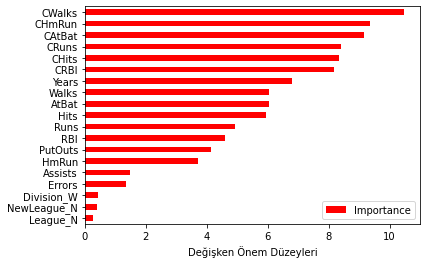

In [79]:
Importance.sort_values(by = "Importance", axis = 0, 
                       ascending = True).plot(kind = "barh", color = "red")
plt.xlabel("Değişken Önem Düzeyleri");

Doğrusal regresyon modellerinde değişkenlerin önemine dair bilgi alabiliyorduk, doğrusal regresyon modellerinin çıktısında gördüğümüz şey değişkenlerin model için anlamlı olup olmadığını ve bu değişkenlerin bağımlı değişkene olan katkılarını gözlemleyebiliyorduk.

RF için kurduğumuz bu modelde değişkenlerin bağımlı değişkene etkilerine göre hatalara olan etkilerine göre anlamlılıklarını bu şekilde elde ettik.

Bu bilgiyle neler yapılabilir? :
1. Görece önemsiz olduğu düşünülen değişkenler çıkartılabilir
2. Değişkenler çaprazlanabilir
3. Farklı değişkenler eklenebilir



Yapısını iyi bildiğimiz bir verisetinin hem değişken gözlem sayısı ve ifade ettiği iş bilgisi hem de taşıdığı bilgi anlamında buraları kullanarak daha ileri düzey konular olan model seçme, değişken seçme ve aralarında karar verme noktalarında da bunlar dayanak noktası olarak kullanılabilir.